In [15]:


import numpy as np
import pandas as pd

import librosa
import librosa.display
import soundfile as sf # librosa fails when reading files on Kaggle.

import matplotlib.pyplot as plt
import IPython.display as ipd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [19]:
audio_path = 'C:\\Users\\asus\\Desktop\\projeee\\araba\\1_araba1.wav'
ipd.Audio(audio_path)

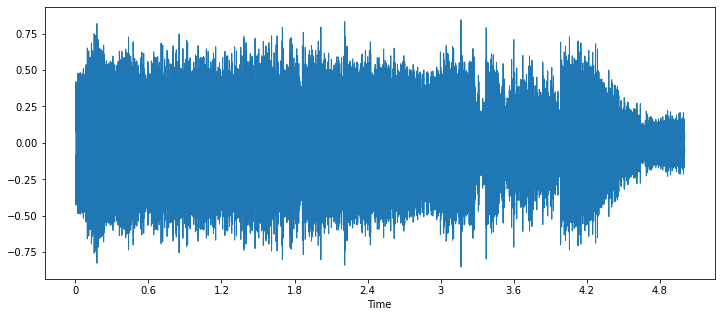

In [21]:
# Extract the audio data (x) and the sample rate (sr).
x, sr = librosa.load(audio_path)

# Plot the sample.
plt.figure(figsize=(12, 5))
librosa.display.waveshow(x, sr=sr)
plt.show()

Number of crosses: 12


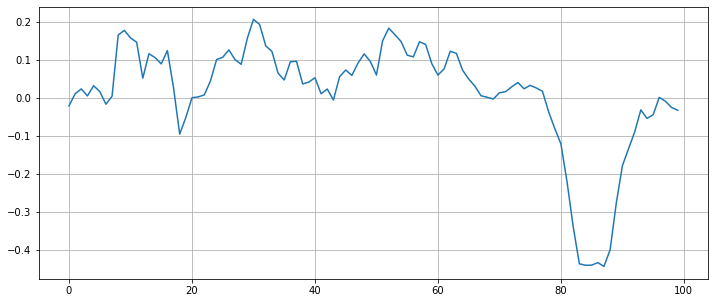

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(x[1000:1100]) # Zoom-in for seeing the example.
plt.grid()

n_crossings = librosa.zero_crossings(x[1000:1100], pad=False)
print(f'Number of crosses: {sum(n_crossings)}')

In [23]:
centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]

print(f'Centroids Shape: {centroids.shape}')
print(f'First 3 centroids: {centroids[:3]}')

Centroids Shape: (216,)
First 3 centroids: [2098.10924102 2369.3833328  2545.78836729]


C:\Users\asus\AppData\Local\Temp/ipykernel_11096/2460199297.py:1: FutureWarning: Pass y=[-0.11533717 -0.14503296 -0.17200027 ...  0.00054071  0.00868484
  0.01930398] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]


MFFCs shape: (20, 216)
First mffcs: [-73.75492  -43.270664 -40.92075  -29.400955 -16.885426]


C:\Users\asus\AppData\Local\Temp/ipykernel_11096/2145709192.py:1: FutureWarning: Pass y=[-0.11533717 -0.14503296 -0.17200027 ...  0.00054071  0.00868484
  0.01930398] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


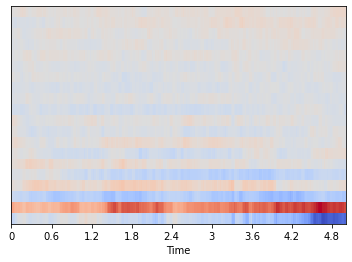

In [27]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(f'MFFCs shape: {mfccs.shape}')
print(f'First mffcs: {mfccs[0, :5]}')
# We can even display an spectogram of the mfccs.
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.show()

In [30]:
def mean_mfccs(x):
    return [np.mean(feature) for feature in librosa.feature.mfcc(x)]

def parse_audio(x):
    return x.flatten('F')[:x.shape[0]] 

def get_audios():
    train_path = "C:\\Users\\asus\\Desktop\\projeee\\"
    train_file_names = os.listdir(train_path)
    train_file_names.sort(key=lambda x: int(x.partition('.')[0]))
    
    samples = []
    for file_name in train_file_names:
        x, sr = sf.read(train_path + file_name, always_2d=True)
        x = parse_audio(x)
        samples.append(mean_mfccs(x))
        
    return np.array(samples)

def get_samples():
    df = pd.read_csv("C:\\Users\\asus\\Desktop\\projeee\\dataAudio0.csv",encoding="ISO-8859-1")
    return get_audios(), df['label'].values

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model_kn  = KNeighborsClassifier()

parameters= {
    'n_neighbors': [50,60,70,80,90],
    
    'leaf_size': [1,5,10,15,25]
}

grid_kn = GridSearchCV(model_kn,parameters, n_jobs=-1)
grid_kn.fit(X_train,y_train)

yt_p = grid_kn.predict(X_train)
yv_p = grid_kn.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

NameError: name 'X_val' is not defined

In [33]:
import os

In [36]:
 int(float(''))

ValueError: could not convert string to float: ''